<h1>EDA and Feature Engineering</h1>

In this notebook feature engineering is performed along with Exploratory Data Analysis side by side

In [47]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import utils
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [48]:
#importing the data
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')
#create copy of train data
train_original = train[:]

In [49]:
train = train.set_index('Id')
ID = test[['Id']]
test = test.set_index('Id')

Performing EDA to understand the data better along with handling of missing values, Outliers and categorical datas

In [50]:
#check the number of features and observations
print("Train: {}".format(train.shape))
print("Test: {}".format(test.shape))

Train: (1460, 80)
Test: (1459, 79)


In [51]:
#check the data type with counts
train.dtypes.value_counts()

object     43
int64      34
float64     3
dtype: int64

In [52]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [53]:
train.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [54]:
#displaying the columns
categorical_features = train.select_dtypes('object')
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [55]:
numeric_features = train.select_dtypes('number')
numeric_features.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [56]:
#see the data information
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [57]:
#understanding the target variable
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

From the above information we can see that minimum value is greater than 0 and all the values seems quite reasonable, now lets look at the distribution of the salesprice.

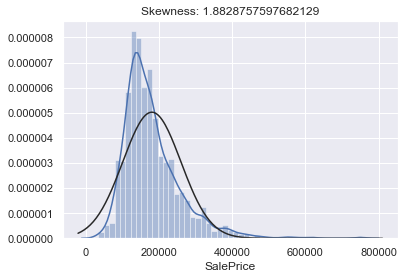

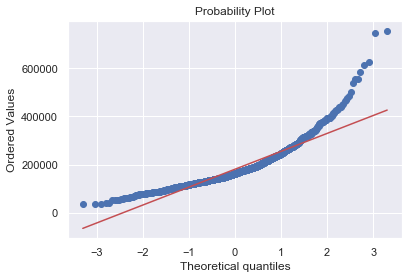

In [58]:
utils.show_dist(train_original['SalePrice'])


We can see that Saleprice is not normal and is positively skewed. We can perform data transformation to fix this problem. Meanwhile we are also keeping the original value for now for futher analysis

In [59]:
#applying log transformation
train.SalePrice = np.log(train.SalePrice)

In [60]:
train.SalePrice.describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

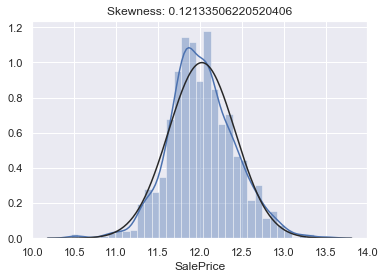

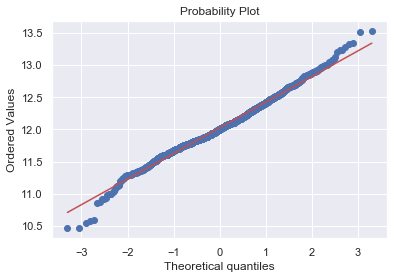

In [61]:
utils.show_dist(train.SalePrice)

We can consider that the target variable has been normalized.

### Hypothesis Generation

Now we generate some of the hypothesis to point out factors which might affect our target variable. 

1. GroundLivingArea (GrLivArea) and TotalBsmtSF will be directly proportional to the price of the house. 
2. The SalePrice will be high for better OverallQuality.
3. SalesPrice will be high for the hoses built recently.
4. SalePrice of House will be high on more popular Neighborhood.

Lets check our assuptions one by one and understand data more properly using <b>bivariate analysis </b>

In [62]:
#scater plot
plt.style.use('ggplot')
def show_scatter(var):
    sns.scatterplot(x = var, y = 'SalePrice', data = train_original)
    plt.show()

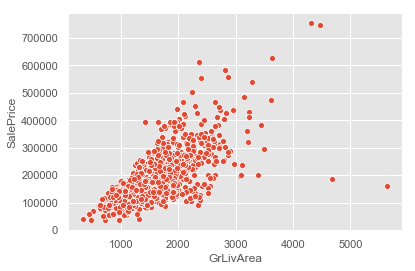

In [63]:
show_scatter('GrLivArea')

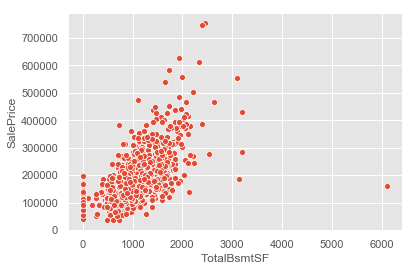

In [64]:
show_scatter('TotalBsmtSF')

We can see that there is a linear relationship between GrLivArea and SalePrice and also between totalbsmtsf and saleprice. which validates our hypothesis. 

In [65]:
def show_box(var):
    fig = sns.boxplot(x=var, y='SalePrice', data = train_original)
    fig.set_xticklabels(fig.get_xticklabels(), rotation=60)
    fig.axis(ymin =0, ymax = 800000)

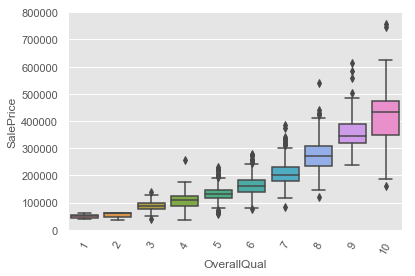

In [66]:
show_box('OverallQual')

Better the overallQual higher the price, which validates our second hypothesis as well.

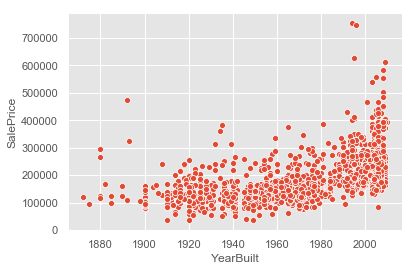

In [67]:
#hypothesis for yrbuilt
show_scatter('YearBuilt')

The relationship doesnot seem too strong, however, houses built recently usually tends to be more expensive.

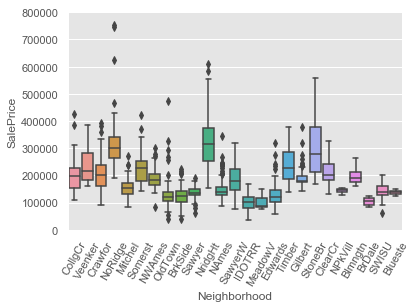

In [68]:
#relation with neighbourhood
show_box('Neighborhood')

Price of some houses in some neighborhood are higher where as other are lower.we can be more clear about it later.

#### Missing Data

Before having a futher look at data, we first try to see the null values and deal with them

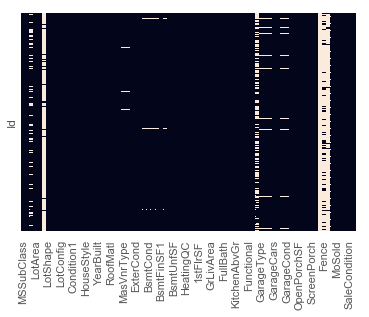

In [69]:
#using function from utils module
utils.visualize_nulls(train)

In [70]:
print('=====================================')
print('=====================================')
missing_train = utils.null_info(train).head(10)
print(missing_train)
print('=====================================')
missing_test = utils.null_info(test).head(10)
print(missing_test)
print('=====================================')
print('=====================================')

              total  percent
PoolQC         1453    99.52
MiscFeature    1406    96.30
Alley          1369    93.77
Fence          1179    80.75
FireplaceQu     690    47.26
LotFrontage     259    17.74
GarageType       81     5.55
GarageCond       81     5.55
GarageFinish     81     5.55
GarageQual       81     5.55
              total  percent
PoolQC         1456    99.79
MiscFeature    1408    96.50
Alley          1352    92.67
Fence          1169    80.12
FireplaceQu     730    50.03
LotFrontage     227    15.56
GarageCond       78     5.35
GarageFinish     78     5.35
GarageYrBlt      78     5.35
GarageQual       78     5.35


We can see that there are some values with too many missing values. These features will obviously not give much information and are more likely to act as outliers so, we can safely drop these features.

In [71]:
train.shape, test.shape

((1460, 80), (1459, 79))

In [72]:
#dropping features with more than 75% of null values
train = train.drop((missing_train[missing_train.percent > 75]).index, 1)
test = test.drop((missing_test[missing_test.percent > 75]).index, 1)
train.shape, test.shape

((1460, 76), (1459, 75))

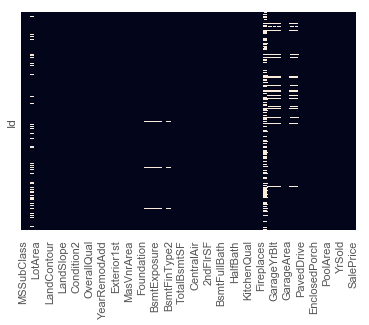

In [73]:
utils.visualize_nulls(train)

Features with most of the null values has been removed, however, there are still null values present int he data. We perform imputation for them based on their category.

In [74]:
target = train.SalePrice
train = train.drop(['SalePrice'], axis =1)
categorical_features = train.select_dtypes('object')
numerical_features = train.select_dtypes('number')

In [75]:
# checking number of categorical features and numeric
print('Categorical Features: {}'.format(len(categorical_features.columns)))
print('Numeric Features: {}'.format(len(numerical_features.columns)))

Categorical Features: 39
Numeric Features: 36


In [76]:
train = utils.handle_categorical(categorical_features.columns,train)
test = utils.handle_categorical(categorical_features.columns,test)

In [77]:
train = utils.handle_numeric(numerical_features.columns, train)
test = utils.handle_numeric(numerical_features.columns, test)

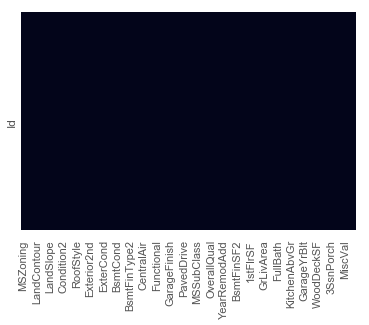

In [78]:
utils.visualize_nulls(train)

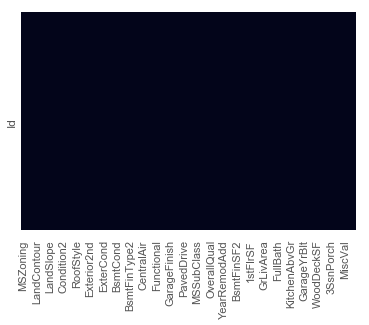

In [79]:
utils.visualize_nulls(test)

Finally we have fixed the problem of missing values for both the dataframes. Now for conistency we will concat both the dataframes train and test for them and perform various fixes on them to make sure that they have equal number of columns. Finally during the modeling we will split those datasets into test and train again. For further exploration we will use our train_original dataset

In [80]:
#append the target to train back again
train['SalePrice'] = target

In [81]:
train.shape, test.shape, len(target)

((1460, 76), (1459, 75), 1460)

Now lets look at the correlation matrix and see the most correlated features.

<Figure size 864x648 with 0 Axes>

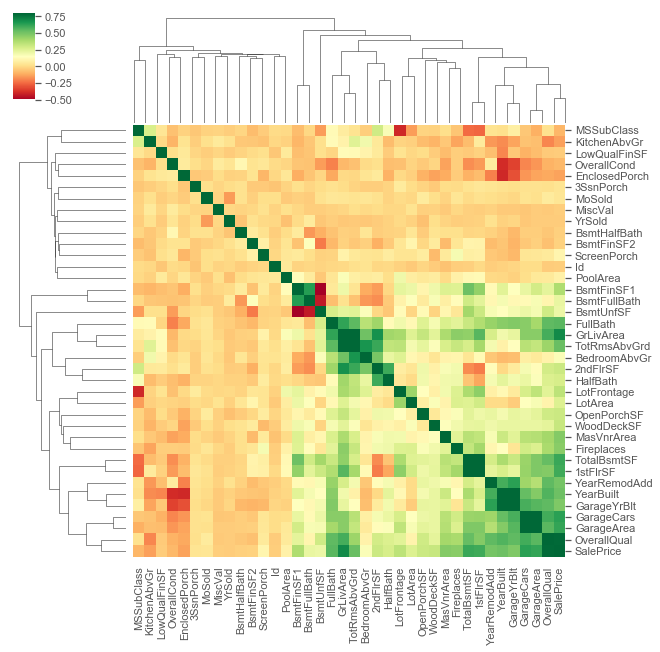

In [82]:
#Correlation matrix
corrmat = train_original.corr()
plt.figure(figsize = (12,9))
sns.clustermap(corrmat, vmax=.8, square = True, cmap='RdYlGn')
plt.show()

From the above sorted heatmap, we can see that there are various features having strong correlation with the SalePrice. Similarly, several features have high correlation among themselves which raise the doubt of multicollinearity. These features are more likely to give same kind of information.

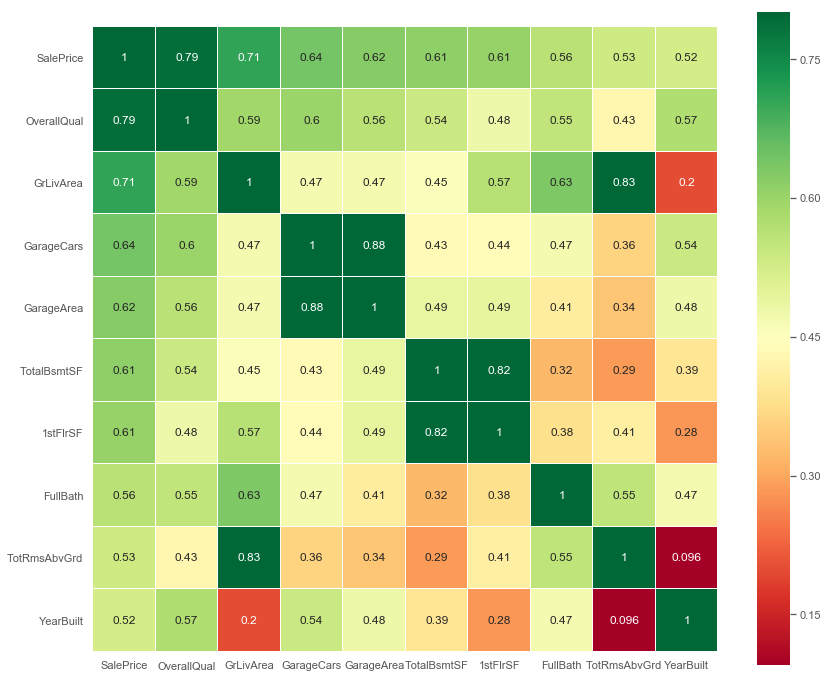

In [83]:
#Saleprice correlation matrix( Zoomed heatmap style)
top_features=corrmat.nlargest(10, 'SalePrice')['SalePrice']
cols = top_features.index
cm = np.corrcoef(train_original[cols].values.T)
plt.figure(figsize = (14,12))
sns.heatmap(cm, vmax=0.8, square=True, annot=True, linewidths=0.01, linecolor='white', xticklabels=cols.values, yticklabels=cols.values, annot_kws = {'size':12}, cmap='RdYlGn')
plt.show()

From the above zoomed heatmap we can spot couple of things.
* OverallQual, GrLivArea and TotalBsmtSF are strongly correlated with saleprice.
* GarageArea and Garaage are strongly correlated with saleprice, but number of cars that fit into the garage is the consequence fo garage area, so they are like twin brother and we need just one variable. We can keep garage cars as its correlation with saleprice is much higher.
* TotalBsmtSF and 1stFloor seems to be twinbrother as well and this totally makes same.
* Similarly, TotalRmsbvGrd and GrLivArea also looks like twin brother.

#### Collinear Variables
we look for any variables that have correlation greater than 0.8 with other variables

In [84]:
#set the threshold
threshold = 0.8

#Empty dictionary to hold correlated variables
above_threshold_vars= {}

#for each column, record the variables that are above the threshold
for col in corrmat:
    above_threshold_vars[col] = list(corrmat.index[corrmat[col]>threshold])

For each of these pairs of highly correlated variables, we only want to remove one of the variables.

In [85]:
above_threshold_vars

{'Id': ['Id'],
 'MSSubClass': ['MSSubClass'],
 'LotFrontage': ['LotFrontage'],
 'LotArea': ['LotArea'],
 'OverallQual': ['OverallQual'],
 'OverallCond': ['OverallCond'],
 'YearBuilt': ['YearBuilt', 'GarageYrBlt'],
 'YearRemodAdd': ['YearRemodAdd'],
 'MasVnrArea': ['MasVnrArea'],
 'BsmtFinSF1': ['BsmtFinSF1'],
 'BsmtFinSF2': ['BsmtFinSF2'],
 'BsmtUnfSF': ['BsmtUnfSF'],
 'TotalBsmtSF': ['TotalBsmtSF', '1stFlrSF'],
 '1stFlrSF': ['TotalBsmtSF', '1stFlrSF'],
 '2ndFlrSF': ['2ndFlrSF'],
 'LowQualFinSF': ['LowQualFinSF'],
 'GrLivArea': ['GrLivArea', 'TotRmsAbvGrd'],
 'BsmtFullBath': ['BsmtFullBath'],
 'BsmtHalfBath': ['BsmtHalfBath'],
 'FullBath': ['FullBath'],
 'HalfBath': ['HalfBath'],
 'BedroomAbvGr': ['BedroomAbvGr'],
 'KitchenAbvGr': ['KitchenAbvGr'],
 'TotRmsAbvGrd': ['GrLivArea', 'TotRmsAbvGrd'],
 'Fireplaces': ['Fireplaces'],
 'GarageYrBlt': ['YearBuilt', 'GarageYrBlt'],
 'GarageCars': ['GarageCars', 'GarageArea'],
 'GarageArea': ['GarageCars', 'GarageArea'],
 'WoodDeckSF': ['WoodDeckS

In [86]:
#track columns to remove and columns already examined
cols_to_remove = []
cols_seen = []
cols_to_remove_pair = []

#Iterate through columns and correlated columns
for key, value in above_threshold_vars.items():
    #keep track of columns already examined
    cols_seen.append(key)
    for x in value:
        if x == key:
            next
        else:
            #only want to remove one in a pair
            if x not in cols_seen:
                cols_to_remove.append(x)
                cols_to_remove_pair.append(x)
                
cols_to_remove = list(set(cols_to_remove))
print('Number of columns to remove: {}'.format(len(cols_to_remove)))

Number of columns to remove: 4


So there are 4 columns that we can remove to tackle the problem of multicollinearity.

In [87]:
train.shape, test.shape

((1460, 76), (1459, 75))

In [88]:
train = train.drop(columns = cols_to_remove)
test = test.drop(columns = cols_to_remove)
train.shape, test.shape

((1460, 72), (1459, 71))

#### Multivariate Analysis
Using pairplot for multivariate analysis This method is very handy to see the relation between the various features themselves and also to spot the outliers.

In [89]:
featureList = list(cols)

In [90]:
new_feature = [ele for ele in featureList if ele not in cols_to_remove]

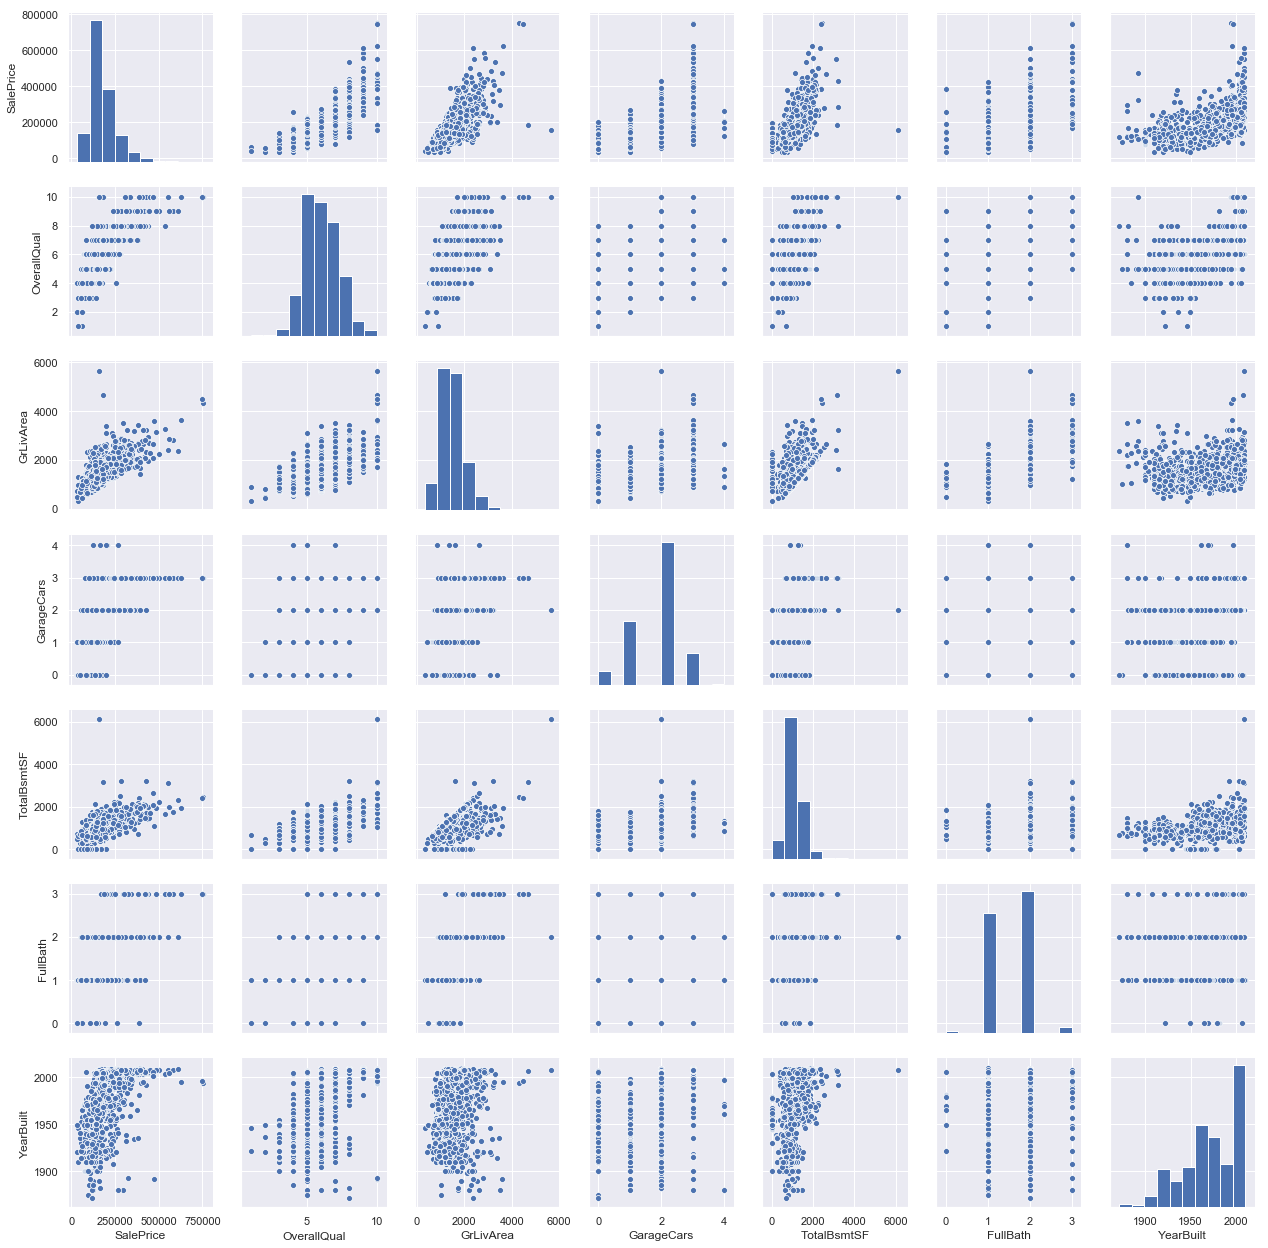

In [91]:
sns.set()
sns.pairplot(train_original[new_feature], size=2.5)
plt.show()

The mega scatter plot gives us some important information.
Area that is giving import information is between totalbsmtsf and GrLivArea, they seem to have a linear relationship as discussed before. Similarly Yearbuilt and Sale Price appears to be a shy exponential function.
Meanwhile we can also see some outliers in the above graph clearly. We can perform Bivariate Analysis to have a closer look on those outliers

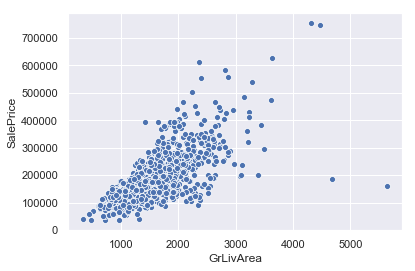

In [92]:
show_scatter('GrLivArea')

From the above graph we can see that there are two bigger points on the lower left and they seems to be like an outlier, the upper two points are following the trend so they are less likely to be an outlier

In [93]:
train.shape, test.shape

((1460, 72), (1459, 71))

In [94]:
#deleting the points
train = train[train['GrLivArea'] < 4600]
test = test[test['GrLivArea'] < 4600]

train.shape, test.shape

((1458, 72), (1458, 71))

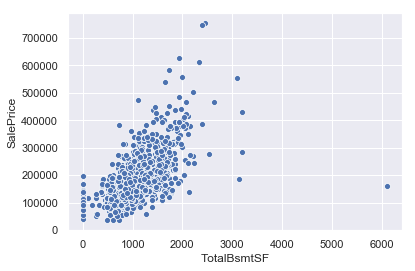

In [95]:
#bivariate analysis of totalbsmtsf
show_scatter('TotalBsmtSF')

In [96]:
train = train[train['TotalBsmtSF'] < 4000]
test = test[test['TotalBsmtSF'] < 4000]

train.shape, test.shape

((1458, 72), (1458, 71))

Now, we have sucessfully handled missing values, collinear values and outliers. Now lets do some Univariate Analysis to check distribution of the other fields. 

#### Handling Skew for rest of the data

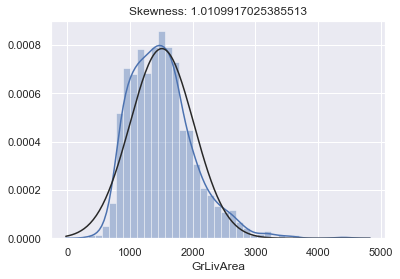

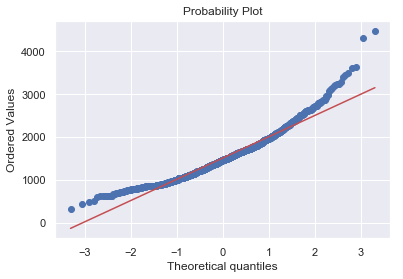

In [97]:
utils.show_dist(train.GrLivArea)

We can see that the above field is skewed so we try to fix or simply reduce the skewness of the fields. The data is said to be perfectly symmentrical if skewness is 0 but this is unlikely for real world data. So If the skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

In [98]:
#functiion to normalize 
def correct_skew(df):
    #columns candidates of skew (-0.5 to 0.5)
    cols = df.select_dtypes('number').columns
    skew_df = [col for col in df[cols].columns if (abs(df[col].skew())>0.5)]
    print(len(skew_df))
    
    #function to correct skew:
    def skewfix(data, data2):
        for i in data2:
            data[i] = np.log1p(data[i])

        return data
        
    return skewfix(df, skew_df)


In [99]:
train = correct_skew(train)

26


In [100]:
test = correct_skew(test)

23


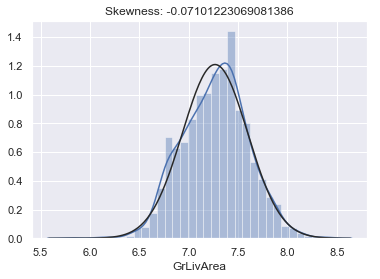

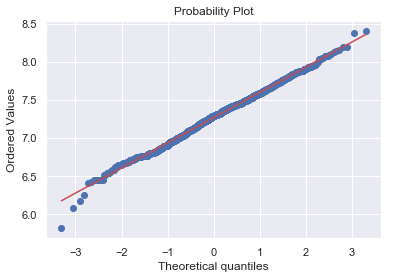

In [101]:
utils.show_dist(train.GrLivArea)

The distribution looks acceptable now.

#### Handling categorical Variables

Now lets move forward and handle the categorical Features by encoding those values. For consistency we will concat the train and test dataset and which we will concat later on for consistency

In [102]:
train.shape, test.shape

((1458, 72), (1458, 71))

In [103]:
target = train.SalePrice
train = train.drop(['SalePrice'], axis = 1)

In [104]:
train.shape, test.shape, len(target)

((1458, 71), (1458, 71), 1458)

In [105]:
final_df = pd.concat([train, test], axis=0)
final_df.dtypes.value_counts()

object     39
float64    27
int64       5
dtype: int64

Now lets look at the number of unique entries in each of the categorical columns

In [106]:
#Number of unique classes in each object column
final_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          7
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64


Here we can see that most of the categorical variables have relatively small numbers of unique entries only few of them have many categories. Now, we perform two types of encoding here, LabelEncoding and OneHotEncoding.
* LabelEncoding: This type of encoding doesnot create new columns so we will apply this for only those features with 2 categories.
* One-hot encoding: This type of encoding creates new columns and we use this for features having more than 2 categories.

In [107]:
def perform_encoding(df):
    le_list = []
    one_list = []
    cat_cols = list(df.select_dtypes('object').columns)
    for col in cat_cols:
        if len(list(df[col].unique())) <= 2:
            le_list.append(col)
        else:
            one_list.append(col)
    print("Label Encoder: ",len(le_list))
    print("One Encoder: ",len(one_list))

    df = utils.one_hot_encoding(df, one_list)
    utils.label_Encoding(df, le_list)

    return df


In [108]:
final_df.shape

(2916, 71)

In [109]:
final_df.head(2)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,2.0,0.000000,4.127134,0.0,0.0,0.0,0.0,0.0,2,2008
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,2.0,5.700444,0.000000,0.0,0.0,0.0,0.0,0.0,5,2007


In [110]:
final_df = perform_encoding(final_df)

Label Encoder:  3
One Encoder:  36
Label encoded columns: 3


In [111]:
final_df.head(2)

,Street,Utilities,CentralAir,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,4.110874,4.189655,9.042040,7,1.791759,7.602900,7.602900,...,0,0,0,0,1,0,0,0,1,0
2,1,0,1,3.044522,4.394449,9.169623,6,2.197225,7.589336,7.589336,...,0,0,0,0,1,0,0,0,1,0


Now we have more columns that is 231 from 71 after encoding, there must be some duplicated columns that needs to be removed.

In [112]:
final_df = final_df.loc[:,~final_df.columns.duplicated()]
final_df.shape

(2916, 172)

Now let's seperate back our train and test data 

In [113]:
df_train = final_df.iloc[:1458,:]
df_test = final_df.iloc[1458:,:]
#append the target to train back again
df_train['SalePrice'] = target
print(df_train.shape, df_test.shape)

(1458, 173) (1458, 172)


In [114]:
#save the processed data 
df_train.to_csv('dataset/df_train.csv')
df_test.to_csv('dataset/df_test.csv')